## Load data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

names = [*(f'col_{i}' for i in range(1,14)), 'target']
train_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                       header=None, names=names)
val_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', 
                     skiprows=1, header=None, names=names)
val_df['target'] = val_df['target'].str[:-1]

# Run label encoder on all categorical columns
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        le = LabelEncoder()
        le.fit(pd.concat([train_df[column], val_df[column]]))
        train_df[column] = le.transform(train_df[column])
        val_df[column] = le.transform(val_df[column])

## Create Dataset

In [2]:
from deepchecks import Dataset
from deepchecks.checks.methodology.boosting_overfit import BoostingOverfit


train_ds = Dataset(train_df, label='target')
validation_ds = Dataset(val_df, label='target')

Some columns have been inferred as categorical features: col_1, col_3, col_4, col_5, col_6, col_7, col_8. 
 and more... 
For the full list of columns, use dataset.cat_features
Some columns have been inferred as categorical features: col_1, col_3, col_4, col_5, col_6, col_7, col_8. 
 and more... 
For the full list of columns, use dataset.cat_features



## Classification model

Boosting Overfit

Check for overfit occurring when increasing the number of iterations in boosting models.

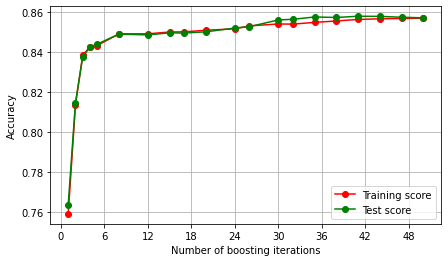

In [3]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=0)
clf.fit(train_ds.features_columns(), train_ds.label_col())
BoostingOverfit().run(train_ds, validation_ds, clf)